In [ ]:
library(tidyr)

In [ ]:
punk = read.csv("combined_cryptopunk_data.csv")

In [ ]:
unique(punk)

In [ ]:
unique(punk$type)

[1] "Human"  "Zombie" "Ape"    "Alien"

#Introduction

###Purpose of the Analysis
This project aims to explore the fascinating world of Non-Fungible Tokens (NFTs), focusing on a specific and highly popular NFT collection known as Cryptopunks. By utilizing Analysis of Variance (ANOVA), the project seeks to uncover pattersn and influences in the pricing of these digital assets. The goal is to understand what factors contribute to the value of Cryptopunks, providing insights into the dynamics of the NFT market.

###Background on NFTs and Cryptopunks
NFTs have emerged as a groundbreaking development in the digital art and collectibles space, representing ownership of unique digital items using blockchain technology. Among these, Cryptopunks stands out as one of the earliest and most iconic collections. Created by Larva Labs, Cryptopunks are algorithmically generated pixel art characters, each with its distict set of features. They have not only become a symbol of status in the digital art world but also a subject of substancial financial investment, reflecting the growing interest and value in digital ownership and collectibility.

###Significance of Cryptpunks in the Digital Asset Market

As pioneers in the NFT space, Cryptopunks offer a valuable case study to analyze the NFT market's trends and valuation factors. Their uniqueness, limited availability, and popularity make them an ideal subject for understanding how various attribues, such as type, gender and accesories, might influence their market value. This analysis has broader implications, shedding light on the valuation mechanisms of digital assets and the behavior of the NFT market as a whole.

In the following sections, we will delve into the process of gathering and preparing the data, followed by a detailed statistical analysis to explore these aspects of Cryptopunks.

#Gathering and Preparing the Data

###Initial Data Search

The journey to find the perfect dataset for this analysis began with an exploration of the Bored Ape Yacht Club (BAYC) NFT collection. I discovered a dataset that included an ID number for each NFT, along with corresponding attributes such as background color, hat, and mouth shape. However, a significant challenge arose: the dataset lacked a quantitative response variable necessary for an effective ANOVA analysis


###Navigating Data Collection Challenges
In pursuit of comprehensive data, I experimented with the Opensea API and various web scraping tools. This endeavor, however, met with substantial obstacles. Opensea has implemented robust measures to protect its data, including dynamic content switching and the use of Cloudflare, effectively mitigating and preventing automated data scraping. Moreover, the Opensea API imposed limitations on the amount of data that could be extracted, rendering it insufficient for our analysis needs

###Turning to Cryptopunks
Faced with these challenges, the focus shifted to another prominent NFT collection: Cryptopunks. Unlike BAYC, the Cryptopunk data was relatively accessible. Utilizing a web scraper, I successfully gathered data on the last 10,000 transactions of Cryptopunks. The dataset compiled includes crucial parameters for each Cryptopunk:

- **ID**: A unique identifier for each of the 10,000 Cryptopunks.
- **Price**: The transaction price, denoted in Ethereum (ETH).
- **Type**: Categories including Alien, Ape, Zombie, or Human, with the first three being significantly rarer.
- **Gender**: Classified as either Male or Female.
- **Skin Tone**: Varies among Medium, Dark, Light, or Albino, with the note that Alien, Ape, and Zombie types do not have a skin tone.

###Handling the Accesories Data
A notable aspect of the Cryptopunk dataset is the 'Accessories' attribute, which comprises over 80 different possible items. Given the complexity and the high dimensionality this attribute introduces, I opted to simplify it by counting the number of accessoreis for each Cryptopunk. This approach allows us to retain valuable information about the accesories while making the data more manageable and conducie to ANOVA modeling. The accessory count offers a quantitative measure reflecting the complexity and potential appeal of each Cryptopunk. A comprehensive list of all attributes can be found [here](https://cryptopunks.app/cryptopunks/attributes).

###Data Prparation Summary
In summary, the dataset preparation invoved combining transaction prices and attributes of Cryptopunks, focusing on variables that would provide meaningful insgihts through ANOVA. The data was cleaned and structured to facilitate a detailed statistical analysis, setting the stage for a deep dive into the factors influencing the value of Cryptopunks in the NFT market.


#Exploratory Data Analysis

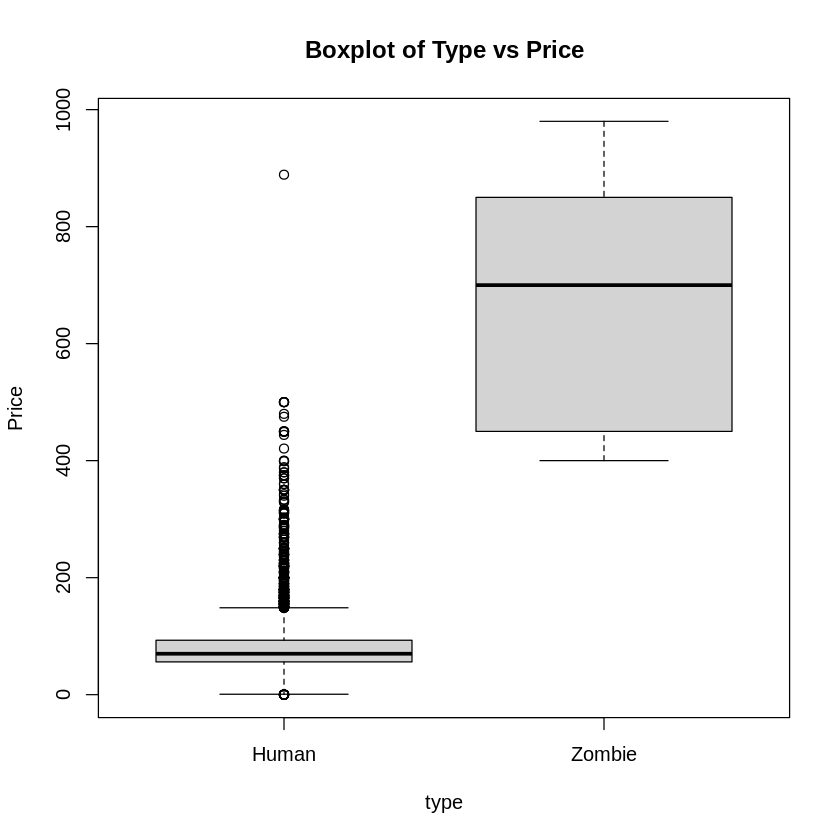

In [ ]:
boxplot(Price~type, data = punk, main = "Boxplot of Type vs Price")

In [ ]:
unique(punk$skin.tone)

[1] "Medium" "Dark"   "Light"  "Albino" ""

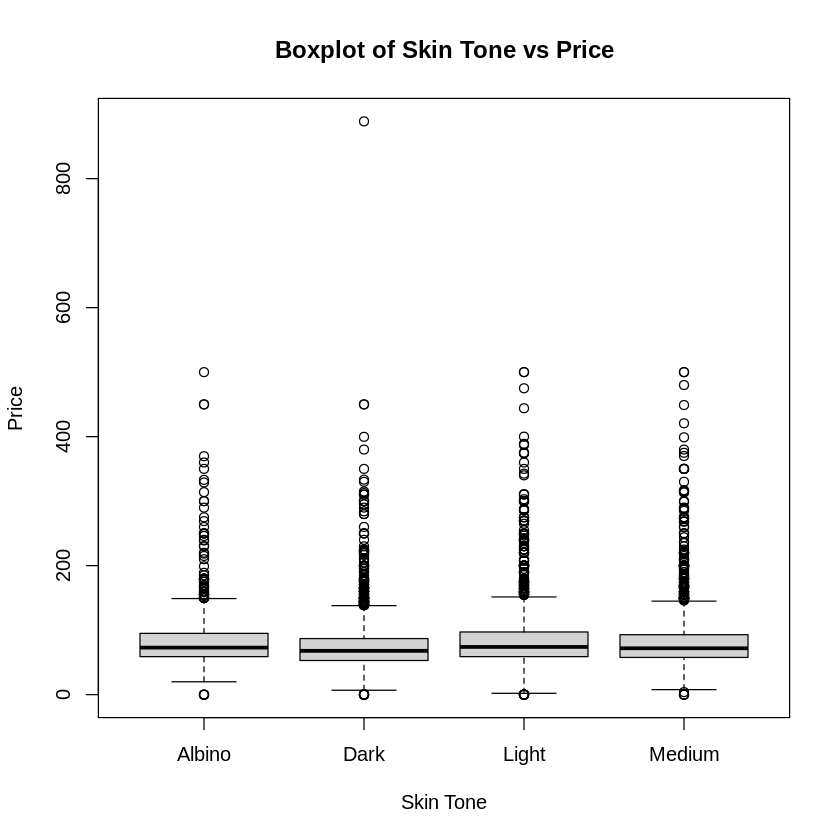

In [ ]:
boxplot(Price[punk$skin.tone != ""]~skin.tone[punk$skin.tone != ""], data = punk, main = "Boxplot of Skin Tone vs Price", xlab = "Skin Tone", ylab = "Price")

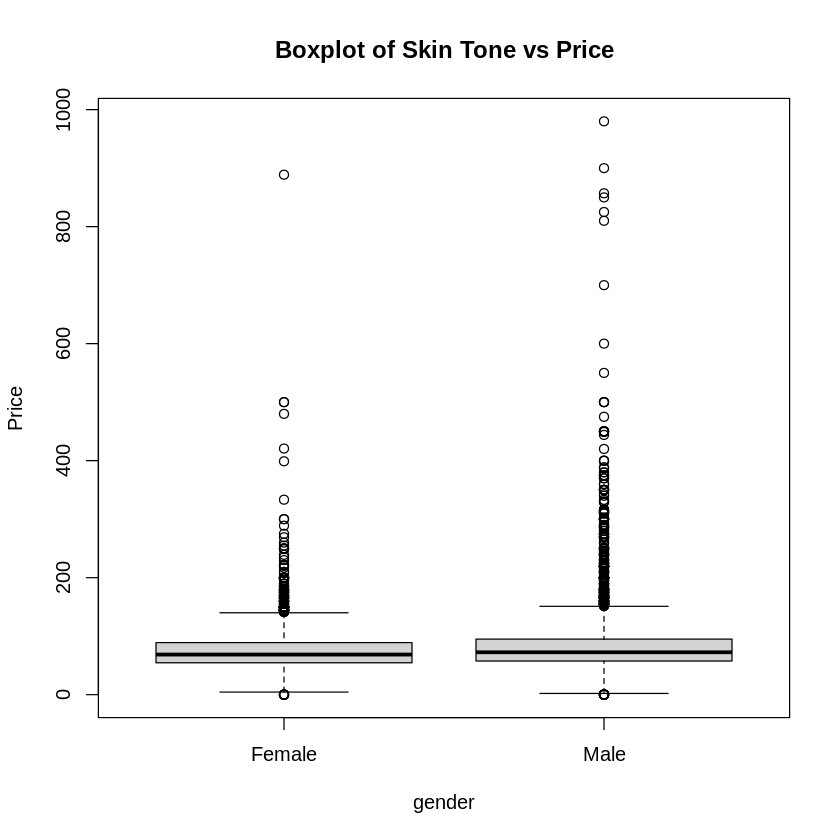

In [ ]:
boxplot(Price~gender, data=punk, main = "Boxplot of Skin Tone vs Price")

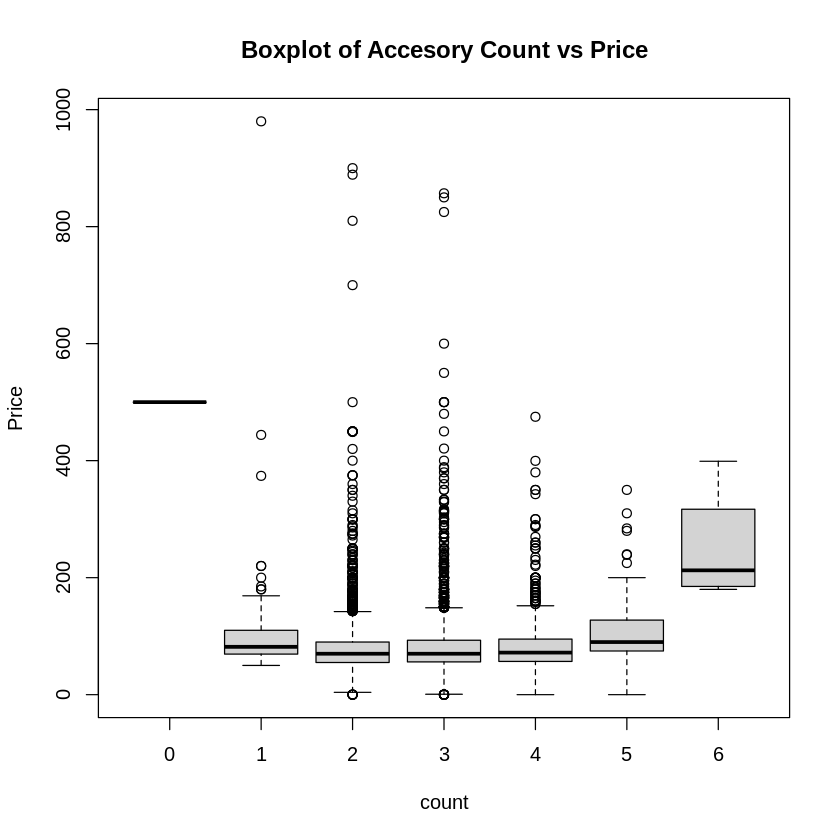

In [ ]:
boxplot(Price~count, data = punk, main = "Boxplot of Accesory Count vs Price")

###Boxplot of Type vs Price:
In the boxplot comparing Types to Price, it is noted that there are no sales data for Aliens or Apes, likely due to their rarity. The sales for Zombies are present but in smaller numbers compared to Humans. We will choose to ignore this category, as the small sample size for Zombie sales make it difficult and results in large standard deviations.

###Boxplot of Skin Tone vs Price and Gender:

In each of these plots, we are seeing a similar spread of data points across all groups with prices mostly ranging betwen 0 and roughly 150. While the presence of outliers is notable, the key to assesing homoscedasticity is the spread of the bulk of the data, not just the presense of the outliers. Thus, one of the assumptions of ANOVA is satisfied.

###Boxplot of Accesory Count vs Price:
The boxplot comparing Accesory Count to Price does not seem to exhibit constant variance, as the spread of prices appears to increase with the number of accesories. Let's see if we can deal with this using transfomations.

In [ ]:
colnames(punk)

[1] "ID"          "Price"       "type"        "gender"      "skin.tone"  
[6] "count"       "accessories"

ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'price' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handle

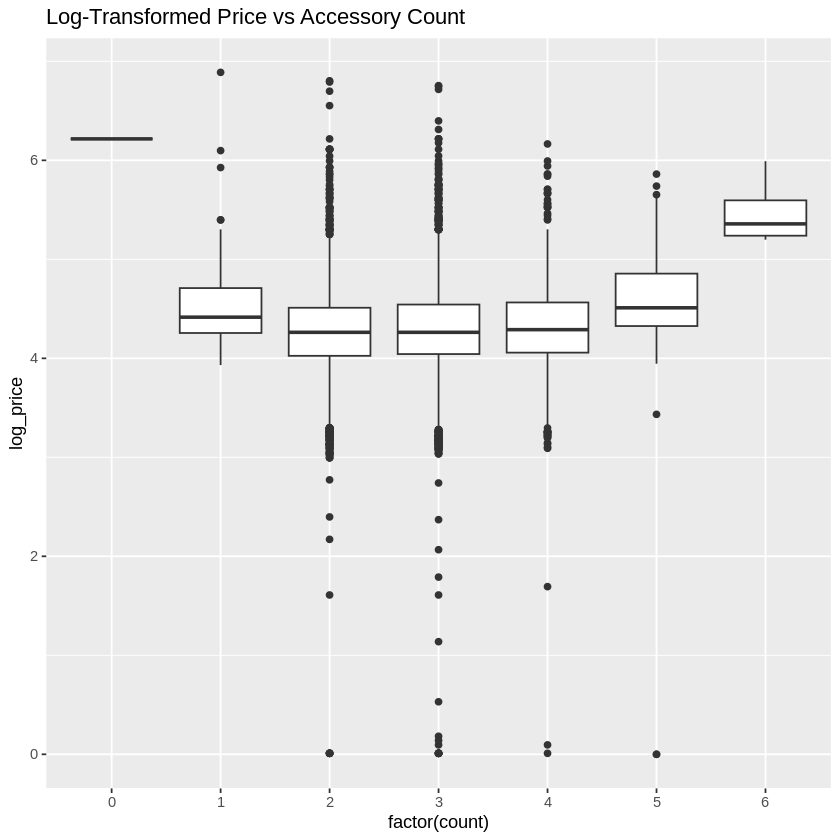

Warning message:
“Removed 18 rows containing non-finite values (`stat_boxplot()`).”


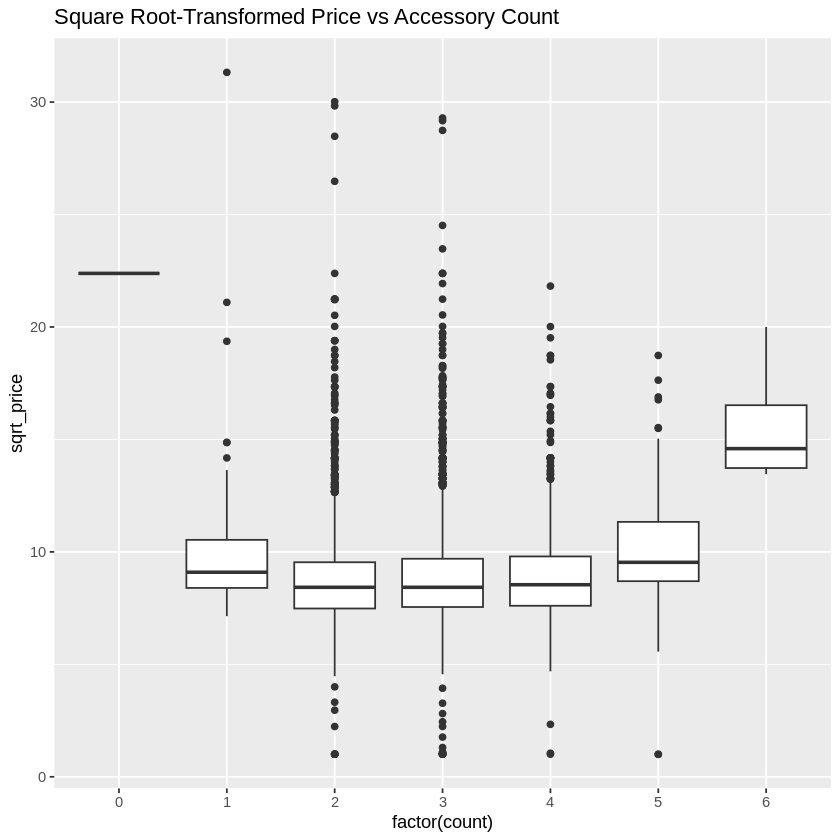

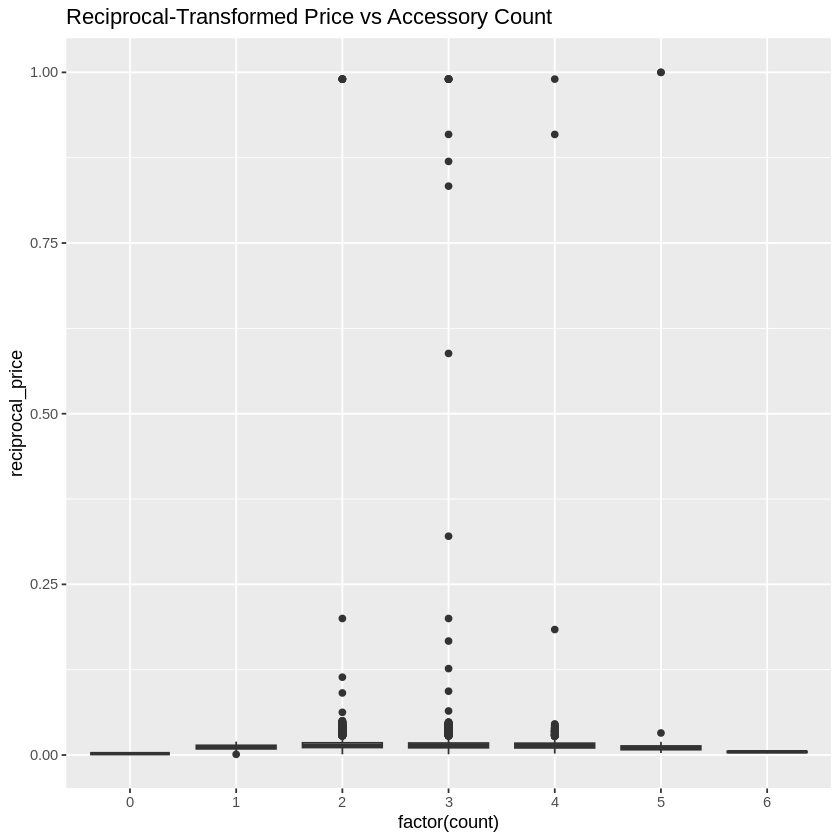

In [ ]:
# Applying a log transformation
punk$log_price = log(punk$Price + 1)

# Applying a square root transformation
punk$sqrt_price = sqrt(punk$Price + 1)

# Applying a reciprocal transformation
punk$reciprocal_price = 1/(punk$Price + 1)

# Now let's plot these transformations to check for constant variance

# Load necessary libraries
library(ggplot2)

# Plotting the original Price vs Accessory Count
ggplot(punk, aes(x=factor(count), y=price)) +
  geom_boxplot() +
  labs(title="Original Price vs Accessory Count")

# Plotting the Log-Transformed Price vs Accessory Count
ggplot(punk, aes(x=factor(count), y=log_price)) +
  geom_boxplot() +
  labs(title="Log-Transformed Price vs Accessory Count")

# Plotting the Square Root-Transformed Price vs Accessory Count
ggplot(punk, aes(x=factor(count), y=sqrt_price)) +
  geom_boxplot() +
  labs(title="Square Root-Transformed Price vs Accessory Count")

# Plotting the Reciprocal-Transformed Price vs Accessory Count
ggplot(punk, aes(x=factor(count), y=reciprocal_price)) +
  geom_boxplot() +
  labs(title="Reciprocal-Transformed Price vs Accessory Count")

# After plotting, you can visually inspect the spread of the transformed prices within each accessory count group.


In [ ]:
full_model = aov(Price ~ count + gender + skin.tone, data = punk)

In [ ]:
summary(full_model)

              Df   Sum Sq Mean Sq F value   Pr(>F)    
count          1    15428   15428   7.867  0.00504 ** 
gender         1   122038  122038  62.230 3.38e-15 ***
skin.tone      4  4719127 1179782 601.591  < 2e-16 ***
Residuals   9974 19560031    1961                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
18 observations deleted due to missingness

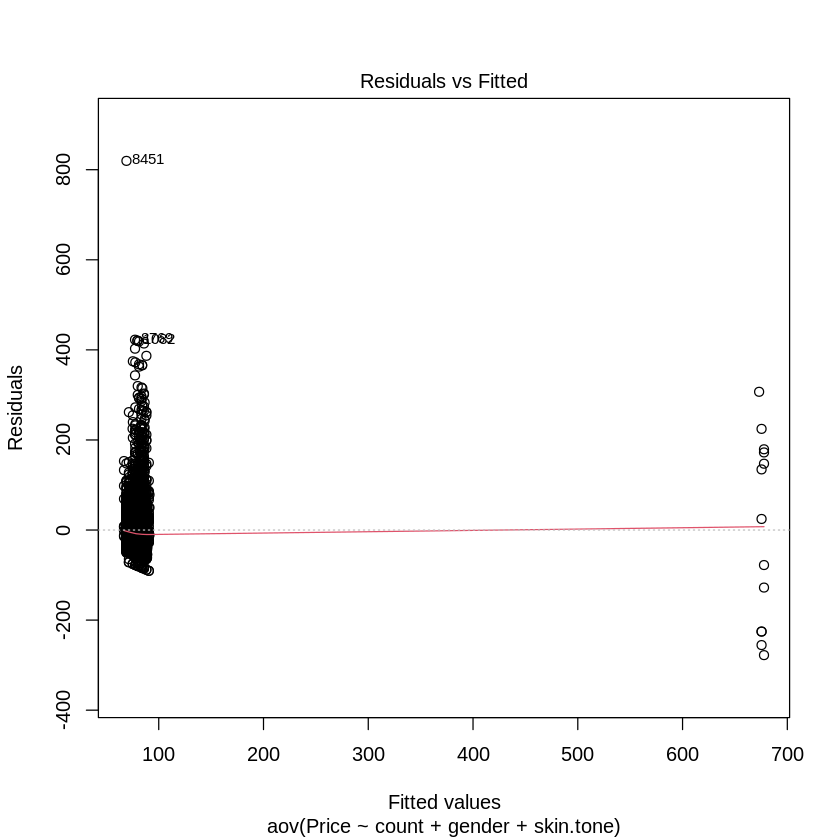

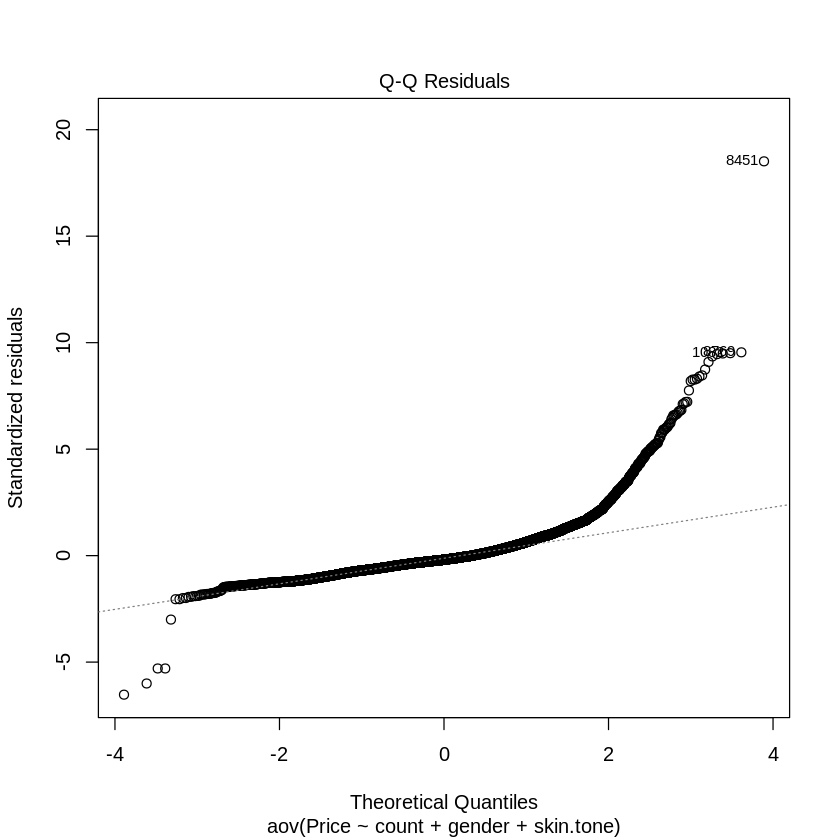

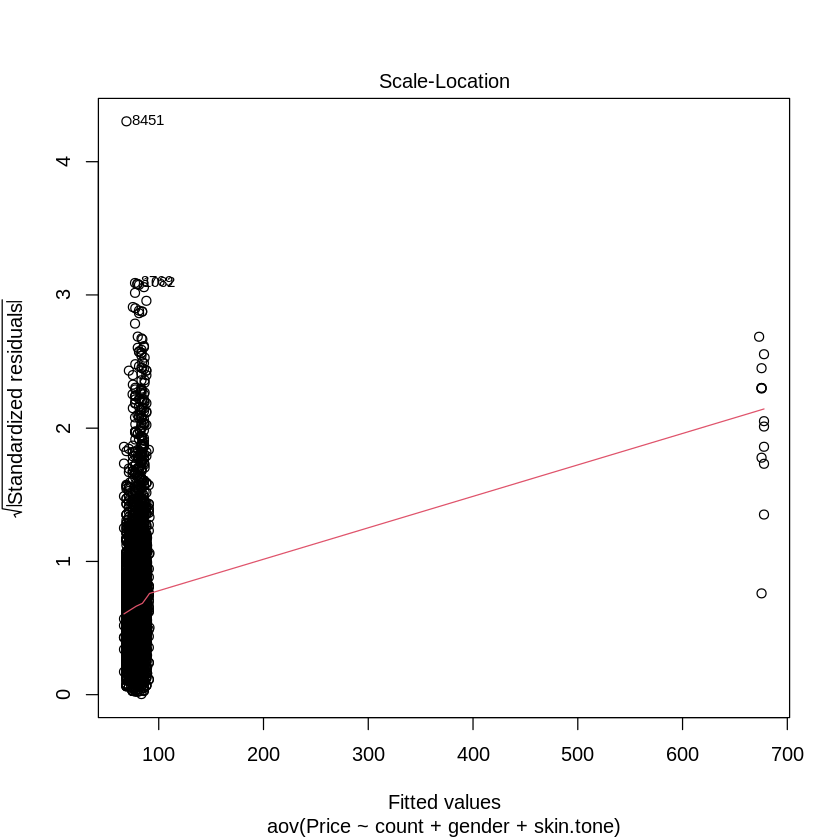

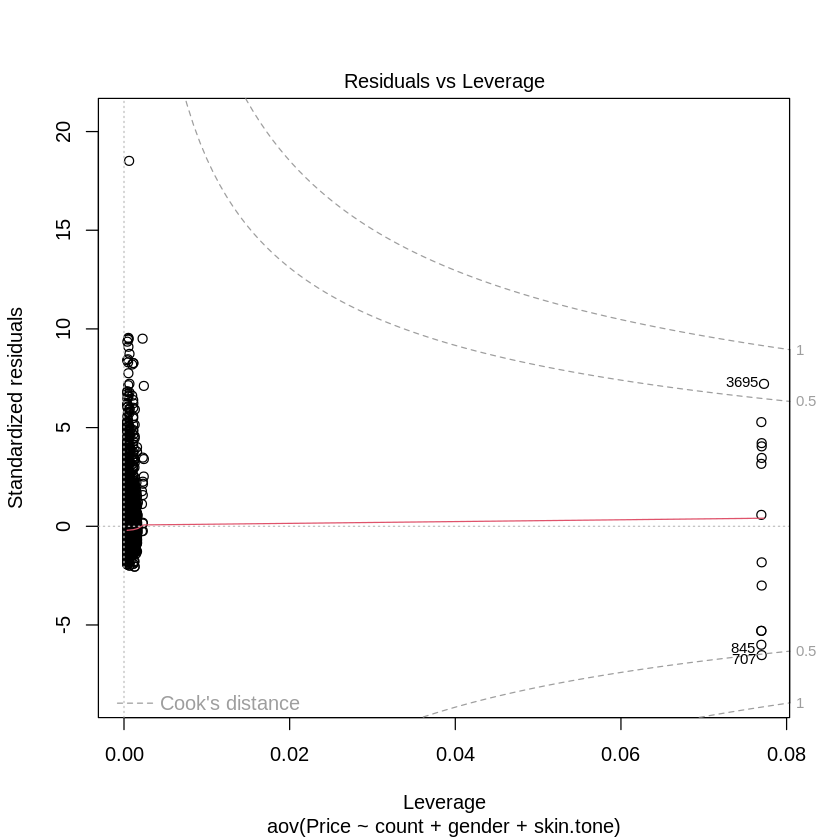

In [ ]:
plot(full_model)

In [ ]:
clean_punk = punk[punk$Price < 400,]

In [ ]:
clean_full_model = aov(Price ~ count + gender + skin.tone, data = clean_punk)

In [ ]:
summary(clean_full_model)

              Df   Sum Sq Mean Sq F value   Pr(>F)    
count          1    43094   43094   26.55 2.62e-07 ***
gender         1    88587   88587   54.57 1.62e-13 ***
skin.tone      3   117292   39097   24.08 1.60e-15 ***
Residuals   9946 16146174    1623                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
18 observations deleted due to missingness

In [ ]:
anova(clean_full_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
count,1,43094.26,43094.261,26.54595,2.622788e-07
gender,1,88586.56,88586.561,54.56908,1.621378e-13
skin.tone,3,117292.05,39097.349,24.08386,1.596592e-15
Residuals,9946,16146174.48,1623.384,NA,NA


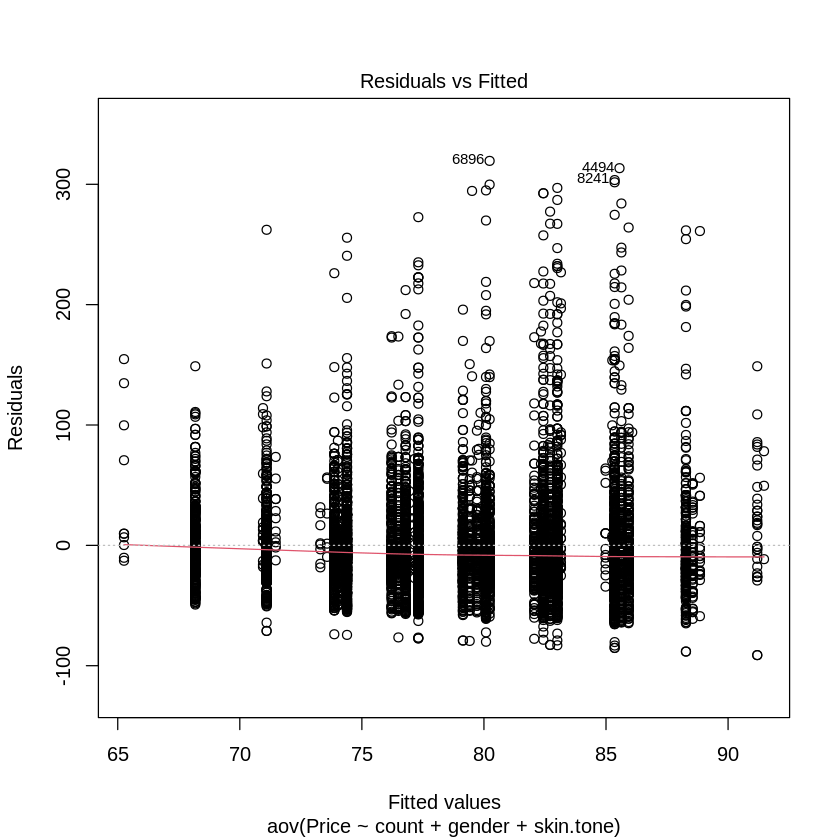

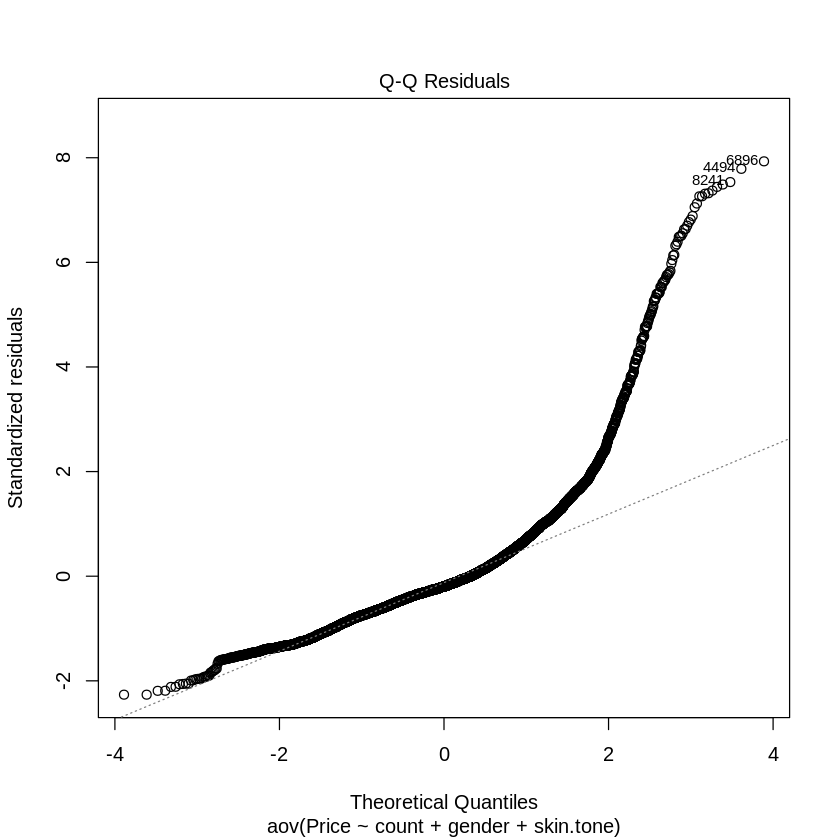

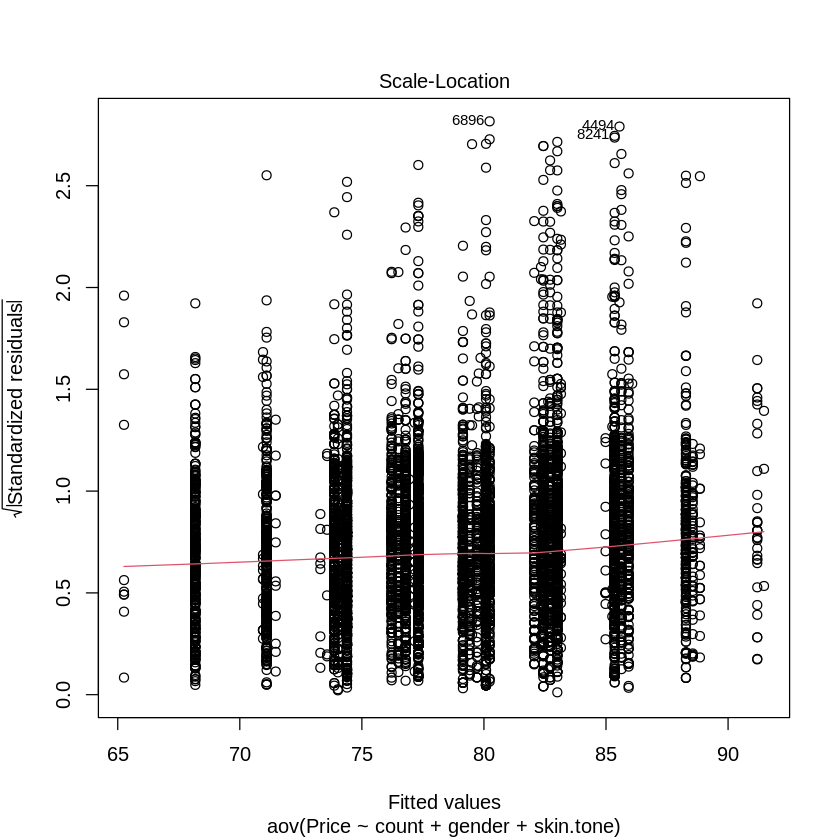

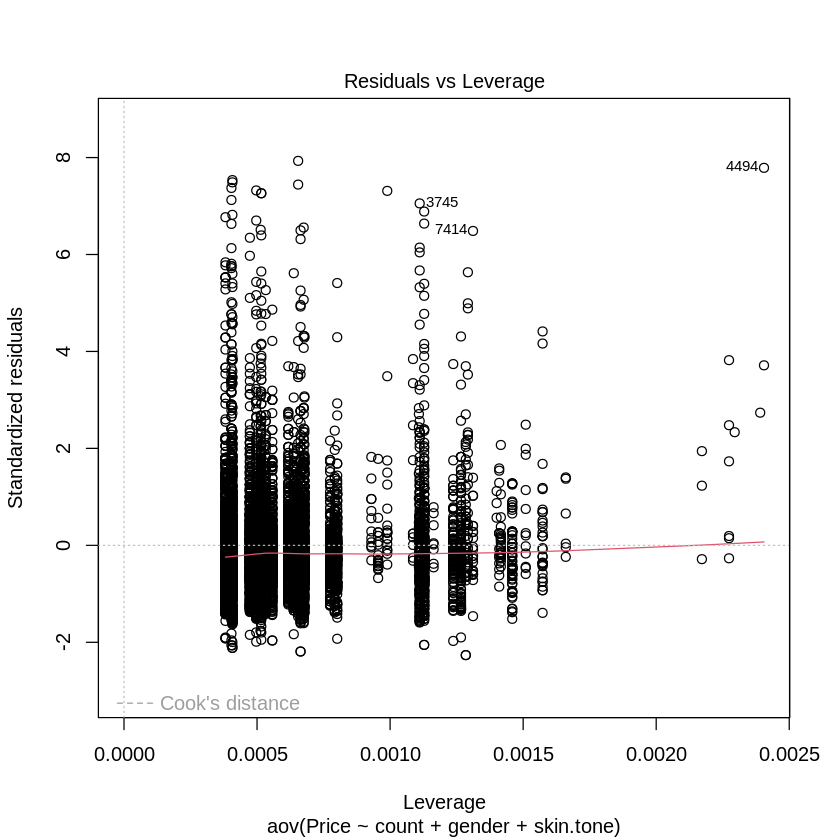

In [ ]:
plot(clean_full_model)